In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
from collections import defaultdict
import copy

df_edges = pd.read_csv('./dataset/facebook_large/musae_facebook_edges.csv')
graph = defaultdict(set)
for u, v in df_edges.itertuples(index=False, name=None):
    graph[u].add(v)
    graph[v].add(u)

print(len(graph))

22470


# Q1

In [ ]:
import numpy as np
import pandas as pd

edge_list = np.loadtxt('./dataset/facebook_large/musae_facebook_edges.csv', delimiter=',', skiprows=1)
print("Total Edges:	", edge_list.shape[0])

node_set = np.unique(edge_list.reshape(-1))
mapping = {val: idx for idx, val in enumerate(node_set)}
rev_mapping = {idx: val for val, idx in mapping.items()}
n_nodes = len(node_set)
print("Total nodes:", n_nodes)

adj_list = [[] for _ in range(n_nodes)]
for a, b in edge_list:
    x, y = mapping[a], mapping[b]
    adj_list[x].append(y)
    adj_list[y].append(x)

for i in range(len(adj_list)):
    adj_list[i] = np.array(adj_list[i], dtype=int)

degree_vals = np.array([len(neighs) for neighs in adj_list])
total_edges = degree_vals.sum() / 2
density_graph = total_edges / n_nodes
print("Overall graph density: {:.4f}".format(density_graph))
print('\n' * 2)

# Excellent idea i saw somewhere 
# Instead of keeping track of the vertics by storing
# we simply use a mask to determine whether or not the vertex is in set

flag_active = np.ones(n_nodes, dtype=bool)
current_deg = degree_vals.copy()

max_density = 0.0

best_flag = flag_active.copy()

densities = []
num_nodes = []

while flag_active.sum() > 0:
    
    curr_edges = current_deg[flag_active].sum() / 2
    curr_nodes = flag_active.sum()
    
    dens = curr_edges / curr_nodes 
    densities.append(dens)
    num_nodes.append(curr_nodes)
    
    if dens > max_density:
        max_density = dens
        best_flag = flag_active.copy()
    
    idx_active = np.where(flag_active)[0]
    min_index = idx_active[np.argmin(current_deg[flag_active])]
    
    # The vertex with min degree is removed
    flag_active[min_index] = False
    
    for neigh in adj_list[min_index]:
        if flag_active[neigh]:
            current_deg[neigh] -= 1

best_nodes = []

for i in range(n_nodes):
    if best_flag[i]:
        best_nodes.append(rev_mapping[i])
print("Vertices in the densest subgraph:", best_nodes)
print("Density of the densest subgraph: {:.4f}".format(max_density))


Total Edges:	 171002
Total nodes: 22470
Overall graph density: 7.6102



Vertices in the densest subgraph: [np.float64(44.0), np.float64(127.0), np.float64(568.0), np.float64(679.0), np.float64(715.0), np.float64(732.0), np.float64(754.0), np.float64(770.0), np.float64(839.0), np.float64(917.0), np.float64(961.0), np.float64(977.0), np.float64(983.0), np.float64(1007.0), np.float64(1123.0), np.float64(1126.0), np.float64(1205.0), np.float64(1209.0), np.float64(1271.0), np.float64(1278.0), np.float64(1387.0), np.float64(1391.0), np.float64(1517.0), np.float64(1586.0), np.float64(1618.0), np.float64(1654.0), np.float64(1745.0), np.float64(1921.0), np.float64(2085.0), np.float64(2160.0), np.float64(2224.0), np.float64(2245.0), np.float64(2284.0), np.float64(2311.0), np.float64(2420.0), np.float64(2422.0), np.float64(2442.0), np.float64(2532.0), np.float64(2596.0), np.float64(2773.0), np.float64(2805.0), np.float64(2874.0), np.float64(2942.0), np.float64(2981.0), np.float64(3073.0), np.flo

In [34]:
print(densities)
print(num_nodes)

[np.float64(7.610235870048954), np.float64(7.610530063643242), np.float64(7.610824283425316), np.float64(7.611118529398674), np.float64(7.611412801566812), np.float64(7.61170709993323), np.float64(7.6120014245014245), np.float64(7.612295775274896), np.float64(7.6125901522571455), np.float64(7.6128845554516715), np.float64(7.613178984861976), np.float64(7.613473440491562), np.float64(7.613767922343931), np.float64(7.614062430422585), np.float64(7.614356964731029), np.float64(7.614651525272768), np.float64(7.614946112051305), np.float64(7.615240725070146), np.float64(7.615535364332799), np.float64(7.615830029842769), np.float64(7.616124721603564), np.float64(7.616419439618691), np.float64(7.616714183891661), np.float64(7.617008954425981), np.float64(7.617303751225163), np.float64(7.617598574292716), np.float64(7.617893423632151), np.float64(7.618188299246981), np.float64(7.618483201140719), np.float64(7.618778129316875), np.float64(7.619073083778966), np.float64(7.619368064530505), np.fl

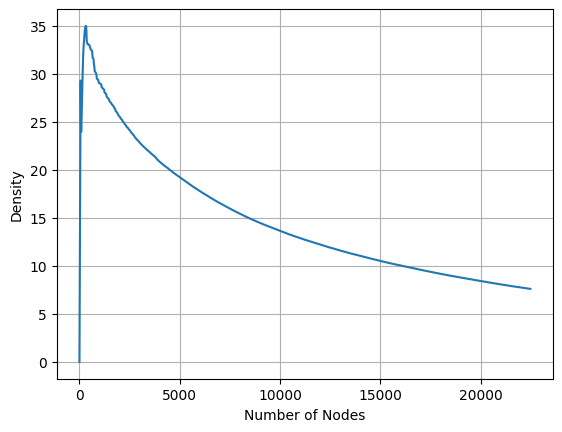

In [35]:
plt.plot(num_nodes,densities)
plt.ylabel("Density")
plt.xlabel("Number of Nodes")
plt.grid()
plt.show()

/tmp/ipykernel_2981/639424090.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[3] not in count:
/tmp/ipykernel_2981/639424090.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count[row[3]] = 1
/tmp/ipykernel_2981/639424090.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count[row[3]]+=1


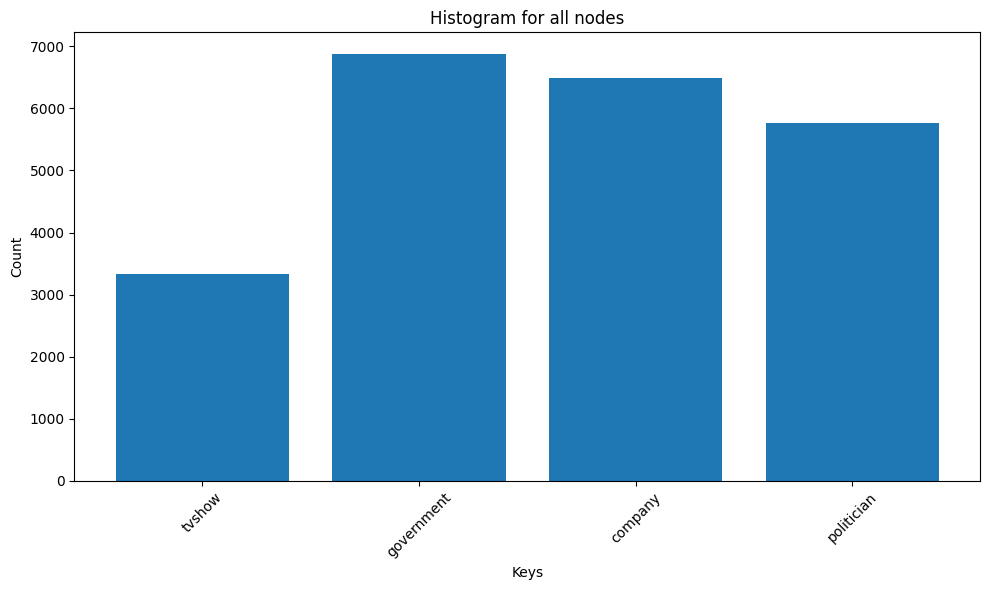

/tmp/ipykernel_2981/639424090.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[3] not in count:
/tmp/ipykernel_2981/639424090.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count[row[3]] = 1
/tmp/ipykernel_2981/639424090.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count[row[3]]+=1


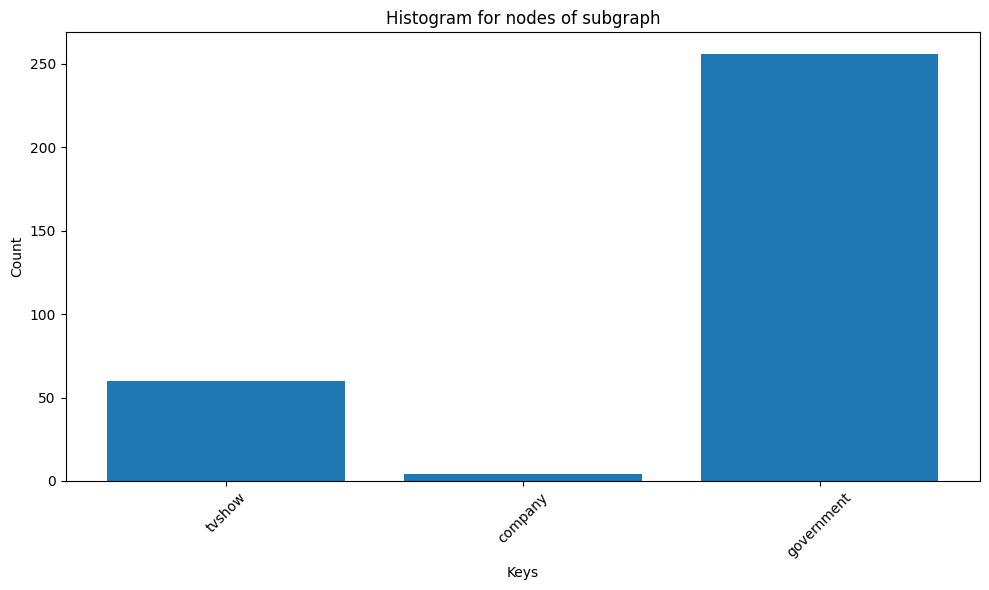

In [13]:
import matplotlib.pyplot as plt


fb_target_df = pd.read_csv('./dataset/facebook_large/musae_facebook_target.csv')
fb_filtered = fb_target_df[fb_target_df['id'].isin(best_nodes)]

count = dict()

for _,row in fb_target_df.iterrows():
    if row[3] not in count:
        count[row[3]] = 1
    else:
        count[row[3]]+=1

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Keys')
plt.ylabel('Count')
plt.title('Histogram for all nodes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



count = dict()

for _,row in fb_filtered.iterrows():
    if row[3] not in count:
        count[row[3]] = 1
    else:
        count[row[3]]+=1



plt.figure(figsize=(10, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Keys')
plt.ylabel('Count')
plt.title('Histogram for nodes of subgraph')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Q2

In [18]:
import pandas as pd

In [19]:
nodes = 1005
adjMat = np.array([[0]*nodes]*nodes)

with open('./dataset/email-Eu-core.txt','r') as f:
    line  = f.readline()
    while line:
        u,v = map(int,line.split())
        adjMat[u][v] = adjMat[v][u] = 1
        line = f.readline()

print(adjMat)

[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
departments = [0]*1005
with open('./dataset/email-Eu-core-department-labels.txt','r') as f:
    line  = f.readline()
    while line:
        u,v = map(int,line.split())
        departments[u] = v
        line = f.readline()
print(departments)

[1, 1, 21, 21, 21, 25, 25, 14, 14, 14, 9, 14, 14, 26, 4, 17, 34, 1, 1, 14, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 5, 34, 14, 14, 17, 17, 10, 10, 36, 37, 5, 7, 4, 22, 22, 21, 21, 21, 21, 7, 7, 36, 21, 25, 4, 8, 15, 15, 15, 37, 37, 9, 1, 1, 10, 10, 3, 3, 3, 29, 15, 36, 36, 37, 1, 36, 34, 20, 20, 8, 15, 9, 4, 5, 4, 20, 16, 16, 16, 16, 16, 38, 7, 7, 34, 38, 36, 8, 27, 8, 8, 8, 10, 10, 13, 13, 6, 26, 10, 1, 36, 0, 13, 16, 16, 22, 6, 5, 4, 0, 28, 28, 4, 2, 13, 13, 21, 21, 17, 17, 14, 36, 8, 40, 35, 15, 23, 0, 0, 7, 10, 37, 27, 35, 35, 0, 0, 19, 19, 36, 14, 37, 24, 17, 13, 36, 4, 4, 13, 13, 10, 4, 38, 32, 32, 4, 1, 0, 0, 0, 7, 7, 4, 15, 16, 40, 15, 15, 15, 15, 0, 21, 21, 21, 21, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 22, 19, 19, 22, 34, 14, 0, 1, 17, 37, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 23, 0, 4, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 10, 14, 14, 1, 14, 7, 13, 20, 31, 40, 6, 4, 0, 8, 9, 9, 10, 0, 10, 14, 14, 14, 14, 39, 17, 4, 28, 17, 17, 17

In [21]:
from collections import defaultdict
departments_dict = defaultdict(set)
for i in range(len(departments)):
    departments_dict[departments[i]].add(i)

print(departments_dict[0])

{257, 130, 262, 903, 907, 781, 656, 402, 148, 149, 277, 278, 284, 156, 157, 668, 289, 680, 681, 682, 814, 178, 179, 180, 692, 824, 191, 575, 839, 712, 851, 214, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 857, 231, 871, 621, 122, 511}


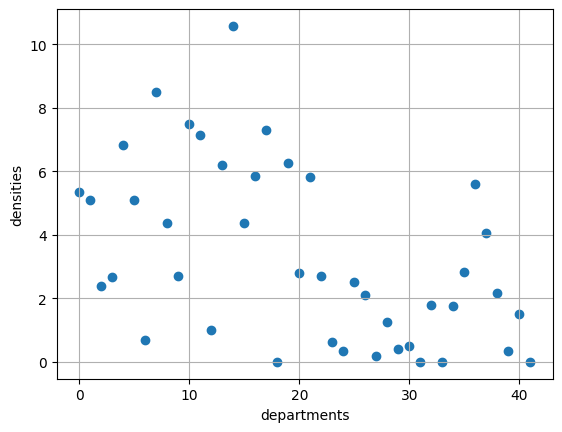

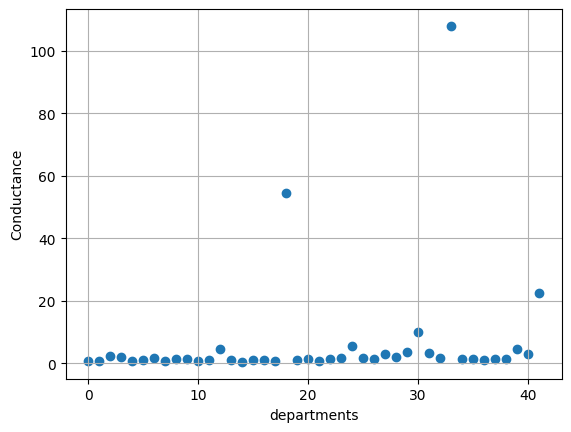

In [23]:
def calculate_density_conductance(adjMat, nodes, total_nodes=1005):
    
    internal_edges_S = 0 
    degree_S = 0
    n = len(nodes)
    for idx, i in enumerate(nodes):
        degree_S += sum(adjMat[i])
        for j in nodes[idx + 1:]:
            internal_edges_S += adjMat[i][j]
    
    total_nodes_set = set(range(total_nodes))
    complement = list(total_nodes_set - set(nodes))
    
    # Calculate internal edges and total degree 
    # for complement set
    internal_edges_V_S = 0
    degree_V_S = 0
    for idx, i in enumerate(complement):
        degree_V_S += sum(adjMat[i])
        for j in complement[idx + 1:]:
            internal_edges_V_S += adjMat[i][j]
    
    # Calculate total number of edges in the graph
    total_degree = sum(sum(adjMat[i]) for i in range(total_nodes))
    total_edges = total_degree / 2 
    
    # Calculate cut edges 
    cut_edges = total_edges - internal_edges_S - internal_edges_V_S
    
    # Calculate density as the average number of internal edges per node in S.
    density = internal_edges_S / n if n > 0 else 0
    
    min_degree = min(degree_S, degree_V_S)
    conductance = cut_edges / min_degree if min_degree != 0 else float('inf')
    
    return density, conductance



size = len(departments_dict)
densities = [0]*size
conductances = [0]*size
for key,value in departments_dict.items():
    density , conductance = calculate_density_conductance(adjMat,list(value))
    densities[key] = density
    conductances[key] = conductance
    if (conductance == 0):
        print(value)



import matplotlib.pyplot as plt
plt.scatter(range(size),densities)
plt.ylabel("densities")
plt.xlabel("departments")
plt.grid()
plt.show()


plt.scatter(range(size),conductances)
plt.ylabel("Conductance")
plt.xlabel("departments")
plt.grid()
plt.show()

In [26]:
n = len(adjMat)
visited = [False] * n

def dfs(node, component):
    visited[node] = True
    component.append(node)
    for neighbor, edge in enumerate(adjMat[node]):
        # Check if there is an edge and neighbor is not visited
        if edge and not visited[neighbor]:
            dfs(neighbor, component)

largest_component = []

for node in range(n):
    if not visited[node]:
        current_component = []
        dfs(node, current_component)
        # Update largest_component if current_component is larger
        if len(current_component) > len(largest_component):
            largest_component = current_component
            
largest_component = np.array(largest_component)
print(len(largest_component))

986


In [39]:
import numpy as np
from collections import Counter

def compute_laplacian(A):
    d = np.array(A.sum(axis=1)).flatten()  
    D_inv_sqrt = np.diag(1.0 / np.sqrt(d + 1e-10))
    I = np.eye(A.shape[0])
    L = I - D_inv_sqrt @ A @ D_inv_sqrt
    return L, d


A = np.array(adjMat[np.ix_(largest_component, largest_component)], dtype=float)
L, degrees = compute_laplacian(A)

eigvals, eigvecs = np.linalg.eigh(L)
sorted_indices = np.argsort(eigvals)
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

second_vector = eigvecs[:, 1]
sorted_nodes = np.argsort(second_vector)
total_degrees = degrees.sum()


best_conductance = np.inf
best_cubt = None

for i in range(1, len(sorted_nodes)):
    print(i)
    candidate = sorted_nodes[:i]
    _,cond = calculate_density_conductance(adjMat,candidate)
    if cond < best_conductance:
        best_conductance = cond
        best_cut = candidate.copy()

print("Sparsest cut conductance:", best_conductance)

cut_departments = [departments[node] for node in best_cut]
dept_histogram = Counter(cut_departments)
print("Department histogram in the sparsest cut:")
for dept, count in dept_histogram.items():
    print(f"  {dept}: {count}")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


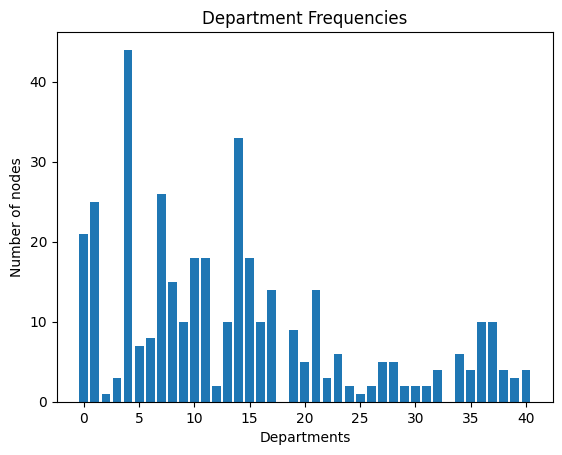

In [45]:
import matplotlib.pyplot as plt

departments = list(dept_histogram.keys())
counts = list(dept_histogram.values())

plt.bar(departments, counts)
plt.xlabel('Departments')
plt.ylabel('Number of nodes')
plt.title('Department Frequencies')
plt.show()


# Q3


Accuracies of both are comparable but Kmeans worked slightly better than Kmedian.

In [10]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42)

data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(3, 1, 100)


data = np.concatenate([data1, data2]).reshape(-1, 1)
true_labels = np.concatenate([np.zeros(100), np.ones(100)])


indices = np.random.permutation(200)
data = data[indices]
true_labels = true_labels[indices]


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(data)
centers_kmeans = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_


accuracy_kmeans = np.mean(labels_kmeans == true_labels)

print(f"KMeans centers: {centers_kmeans.flatten()[0]} and {centers_kmeans.flatten()[1]}")
print(f"Accuracy K means: {accuracy_kmeans}")
print("-" * 30)




data_sorted = np.sort(data.flatten())

best_obj = np.inf
best_idx = -1 
best_center_left = None
best_center_right = None


# try all possible partitions
for s in range(1, len(data_sorted)):
    left_cluster = data_sorted[:s]
    right_cluster = data_sorted[s:]

    # Calculate medians for the potential clusters
    center_left = np.median(left_cluster)
    center_right = np.median(right_cluster)

    obj = np.sum(np.abs(left_cluster - center_left)) + np.sum(np.abs(right_cluster - center_right))

    # Check if this partition is better than the best 
    if obj < best_obj:
        best_obj = obj
        best_idx = s
        best_center_left = center_left
        best_center_right = center_right


labels_kmedian = np.zeros_like(data.flatten(), dtype=int)




for i in range(len(data)):
    dist1 = np.abs(data[i, 0] - best_center_left)
    dist2 = np.abs(data[i, 0] - best_center_right)
    if dist1 <= dist2:
         # Assign label 0
         labels_kmedian[i] = 0 if best_center_left == best_center_left else 1
    else:
         # Assign label 1
         labels_kmedian[i] = 1 if best_center_right == best_center_right else 0



accuracy_kmedian = np.mean(labels_kmedian == true_labels)

print(f"K-median centers: {best_center_left} and {best_center_right}")
print(f"Best partition split occurs after index {best_idx-1} in the sorted data")
print(f"Accuracy of K-medians: {accuracy_kmedian}")

KMeans centers: -0.2160017749688925 and 2.9448110737043294
Accuracy K means: 0.96
------------------------------
K-median centers: -0.21967188783751193 and 3.058208718446
Best partition split occurs after index 94 in the sorted data
Accuracy of K-medians: 0.955


# Q4

Empirically calculating the number of hash functions

m = 1024

n = 210

k = m*log(2) / n

k = 3.37

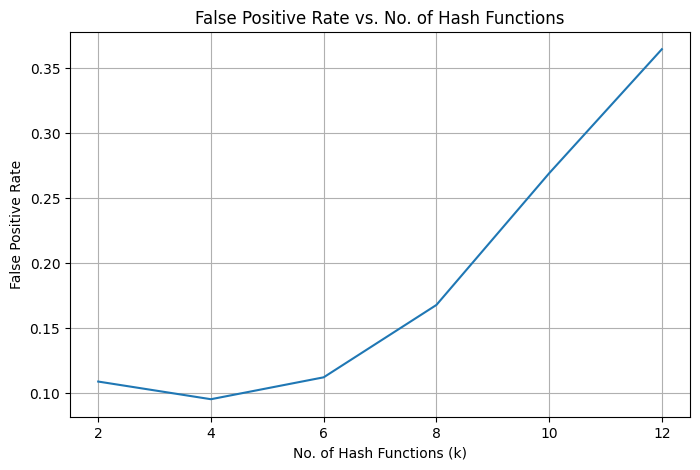


Optimal k: 4 with false positive rate of 0.0950


In [2]:
import hashlib
import random
import string

import matplotlib.pyplot as plt


def generate_strings(num_strings,length = 100):
    letters = string.ascii_letters + string.digits
    
    strings = []
    for i in range(num_strings):
        strings.append(''.join(random.choices(letters, k=length)))
    return strings
    

class BloomFilter:
    def __init__(self, k, m=1024):
        self.k = k            
        self.m = m            
        self.buffer = [0] * m 

    def hashes(self, item):
        positions = []
        for i in range(self.k):
            data = f"{item}anditsindex{i}".encode("utf-8")
            digest = hashlib.md5(data).hexdigest()
            
            pos = int(digest, 16) % self.m
            positions.append(pos)
        return positions

    def insert(self, item):
        for pos in self.hashes(item):
            self.buffer[pos] = 1

    def contains(self, item):
        return all(self.buffer[pos] for pos in self.hashes(item))


m = 1024                        
ks = [2, 4, 6, 8, 10, 12]  
n_insert = 210 

inserted_items = generate_strings(n_insert)

test_no = 50000
test_items = generate_strings(test_no)

fp_rates = []

for k in ks:
    bf = BloomFilter(k, m)
    
    for item in inserted_items:
        bf.insert(item)
    
    # false positive
    fp = 0
    for i in test_items:
        if bf.contains(i):
            fp+=1
    
    fp_rate = fp / test_no
    fp_rates.append(fp_rate)


plt.figure(figsize=(8, 5))
plt.plot(ks, fp_rates)
plt.xlabel("No. of Hash Functions (k)")
plt.ylabel("False Positive Rate")


plt.title("False Positive Rate vs. No. of Hash Functions")
plt.grid(True)
plt.show()

min_rate = min(fp_rates)
optimal = ks[fp_rates.index(min_rate)]
print(f"\nOptimal k: {optimal} with false positive rate of {min_rate:.4f}")
